### ANUSMITA ROY
   - GRIP THE SPARK FOUNDATION- May'21
### TASK : 01 
 - Prediction using Supervised ML

### Linear Regression with Python Scikit Learn(sklearn):
 - This is a simple Linear Regression task involving two variables.
### Simple Linear Regression:
 - From the given remote link, predict the score of a student based on the no. of study hours.

### Steps Followed:
  - Reading and understanding the data
  - Checking for Linear Relationship between the variables.
  - Creating X (independent/ Predictor variable) and  y (dependent/ Response variable).
  - Splitting the data into train and test set.
  - Training the model.
  - Making predictions on the test set.

In [88]:
# Filtering the warnings
import warnings
warnings.filterwarnings('ignore')

In [89]:
#importimg the libraries required

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
#Reading the data from remote link

url="http://bit.ly/w-data"
student=pd.read_csv(url)
student.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [91]:
# Checking the rows and columns of the dataframe
student.shape

(25, 2)

 - To build a linear regression model we first need to check if there is a linear relationship between the predictor and the response.
 - Therefore, plotting a scatter plot we check the linear relationship.

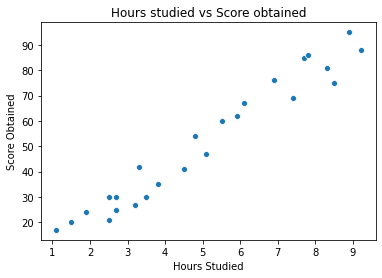

In [92]:
#scatter plot : Hours vs Percentage
sns.scatterplot(data=student,x='Hours',y='Scores')
plt.xlabel("Hours Studied")
plt.ylabel("Score Obtained")
plt.title("Hours studied vs Score obtained")
plt.show()

#### Inference 1 : From the scatterplot we can clearly see that there is a positive linear relationship between hours studied and percentage obtained.

### Splitting the data into train and test set using sklearn:

In [93]:
# Creating X and y:
X=student["Hours"]
y=student["Scores"]

In [94]:
# Splitting the data into train and test set
import sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,test_size=0.30,random_state=100)


In [95]:
# Checking the Shape of the train and test sets
X_train.shape

(17,)

In [96]:
X_test.shape

(8,)

In [97]:
y_train.shape

(17,)

In [98]:
y_test.shape

(8,)

 - sklearn does not take 1D array. Therefore, we need to reshape the train and test set

In [99]:
# Reshaping the train and test set 
X_train_lm=X_train.values.reshape(-1,1)
X_test_lm=X_test.values.reshape(-1,1)

In [100]:
X_train_lm.shape

(17, 1)

In [101]:
X_test_lm.shape

(8, 1)

In [102]:
X_train.head()

6     9.2
12    4.5
4     3.5
24    7.8
0     2.5
Name: Hours, dtype: float64

In [103]:
X_test.head()

9     2.7
22    3.8
13    3.3
11    5.9
5     1.5
Name: Hours, dtype: float64

### Training the model using sklearn:

In [104]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train_lm,y_train)

LinearRegression()

In [105]:
print(lm.coef_)

[9.87171443]


In [106]:
print(lm.intercept_)

1.4951421092364043


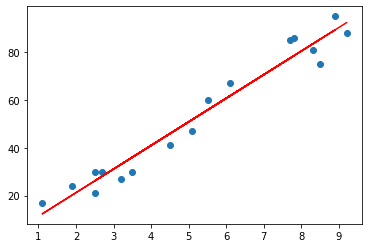

In [107]:
y_train_pred=lm.predict(X_train_lm)
plt.scatter(X_train,y_train)
plt.plot(X_train,y_train_pred,'r')
plt.show()

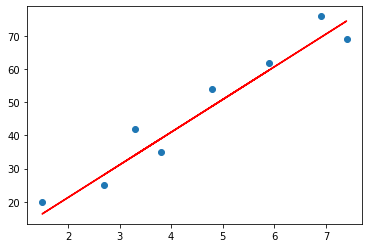

In [108]:
y_test_pred=lm.predict(X_test_lm)
plt.scatter(X_test,y_test)
plt.plot(X_test,y_test_pred,'r')
plt.show()

### Making Predictions:

In [109]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred})
df

,Actual,Predicted
9,25,28.148771
22,35,39.007657
13,42,34.071800
11,62,59.738257
5,20,16.302714
19,69,74.545829
23,76,69.609972
21,54,48.879371


#### The r-squared tells us the strength of the Linear Regression line. Therefore, we calculate the r2_score for both train and test sets.

In [110]:
from sklearn.metrics import r2_score

In [111]:
# R-squared for the train set.
r2_score(y_train,y_train_pred)

0.9570735354094693

In [112]:
# R-squared for the test set
r2_score(y_test,y_test_pred)

0.9309458862687439

 - Inference 2 : The r-squared value for the test set is close to that of the train set. Therefore, we can say that our model is good.

### Predicted Score if the student studies for 9.25 hrs/day:

In [113]:
hours = 9.25
own_pred = lm.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.80850057353504


#### Calculating the rmse ( Root Mean Square Error) for both train and test set.

In [114]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [115]:
rmse_train=sqrt(mean_squared_error(y_train,y_train_pred))
rmse_train

5.5545198609480275

In [116]:
rmse_test=sqrt(mean_squared_error(y_test,y_test_pred))
rmse_test


5.067387845160843

 - Inference 3 : The rmse for test set is close to that of the train set